In [1]:
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
import time
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture

import scipy.cluster.hierarchy as shc
# from yellowbrick.cluster import SilhouetteVisualizer

sns.set_style("white")
sns.set(color_codes=True)

%matplotlib inline

In [2]:
start_time=time.time()

# 1. Read and prepare data

In [3]:


def read_prepare_data(data_all):  
    
    
#     #some cleaning


#     data_all['origin_SHT_PRK_density'] = data_all.apply(lambda 
#                                                                   x: x['origin_SHT_PRK']/x['origin_AREA'], 
#                                                                   axis=1)
#     data_all['origin_LNG_PRK_density'] = data_all.apply(lambda 
#                                                                   x: x['origin_LNG_PRK']/x['origin_AREA'], 
#                                                                   axis=1)

#     data_all['destination_SHT_PRK_density'] = data_all.apply(lambda 
#                                                                        x: x['destination_SHT_PRK']/x['destination_AREA'], 
#                                                                        axis=1)
#     data_all['destination_LNG_PRK_density'] = data_all.apply(lambda 
#                                                                        x: x['destination_LNG_PRK']/x['destination_AREA'], 
#                                                                        axis=1)

    
    selected_X = ['tripDuration','tripDistance_miles',
                          'StartTime_AMPeak','StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night',
                          'origin_emp_density_perMile','destination_emp_density_perMile',
                          'destination_pop_density_perMile','origin_pop_density_perMile',
                          'average_trip_speed_mph','route_directness',
                          'weekend_trip',
                          'origin_CBD', 'origin_URBAN', 'origin_SU', 'origin_RURAL',
                          'destination_CBD','destination_URBAN','destination_SU','destination_RURAL',
                          'origin_SHT_PRK_density','origin_LNG_PRK_density',
                          'destination_SHT_PRK_density', 'destination_LNG_PRK_density', 
                          'origin_NFL_DRAFT', 'origin_VANDERBILT', 'origin_PARK',
                          'destination_NFL_DRAFT', 'destination_VANDERBILT', 'destination_PARK']
    
    nonPCA_data = data_all[selected_X]


    #StandardScaler to transform data
    scaler= StandardScaler()
    # scaler.fit(nonPCA_data)
    nonPCA_data_scaled = scaler.fit_transform(nonPCA_data)



    #PCA dataset
#     #prepare list of columns to use in the model
#     cols=list(data_all.columns)
#     #list columns to remove
#     remove_list= ['trip_id','Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','companyName','tripRecordNum', 'sumdID','tripDuration',
#                  'startLatitude', 'startLongitude', 'endLatitude', 'endLongitude', 'startDateTime', 'endDateTime',
#                  'origin_emp_density_perMile_High', 'destination_emp_density_perMile_High',
#                   'destination_pop_density_perMile_High', 'origin_pop_density_perMile_High',
#                  'tripDistance','euclidean_distance','distance_GPS_trace','trip_start_week_no',
#                   'trip_start_hour_no','weekend_trip']
#     for col in remove_list:
#         cols.remove(col)
        


    #slice data
    PCA_data = data_all[nonPCA_data.columns]             #cols for all data |||||| nonPCA_data.columns for selected data
    
    #copy original selected dataset 
    selected_X.append('trip_id')
    PCA_data_clusters=data_all[selected_X]

    scaler = StandardScaler()
    PCA_data_scaled = scaler.fit_transform(nonPCA_data)           #PCA_data for all data. nonPCA_data for selected data

    # Make an instance of the Model
    pca = PCA()

    
    # create a PCA modified dataset
    pca_dataset = PCA(n_components=8).fit(PCA_data_scaled).transform(PCA_data_scaled)        

    # store it in a new data frame
    pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2',
                                                             'principal component 3','principal component 4',
                                                            'principal component 5','principal component 6',
                                                            'principal component 7','principal component 8'])

    
    return nonPCA_data_scaled, pca_dataset, PCA_data_clusters


#call function to get model dataframe

(nonPCA_data_scaled, pca_dataset, PCA_data_clusters) = read_prepare_data( 
    pd.read_csv('data/MarchMonth_landuse_percentageVar_RouteDirectness__WithFlags_withoutRouteData.csv'))

In [4]:
PCA_data_clusters['tripDistance_miles'].describe()

count    79009.000000
mean         0.527477
std          0.648338
min          0.037904
25%          0.081107
50%          0.194830
75%          0.769879
max          2.999980
Name: tripDistance_miles, dtype: float64

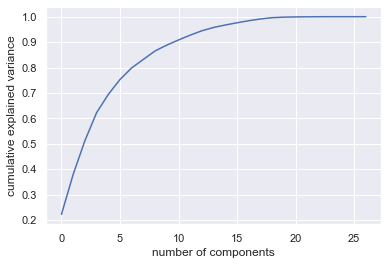

In [5]:
data_pca = pd.read_csv('data/MarchMonth_landuse_percentageVar_RouteDirectness__WithFlags_withoutRouteData.csv')
selected_X = ['tripDuration','tripDistance_miles',
                      'StartTime_AMPeak','StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night',
                      'origin_emp_density_perMile','destination_emp_density_perMile',
                      'destination_pop_density_perMile','origin_pop_density_perMile',
                      'average_trip_speed_mph','route_directness',
                      'weekend_trip',
                      'origin_CBD', 'origin_URBAN', 'origin_SU', 'origin_RURAL',
                      'destination_CBD','destination_URBAN','destination_SU','destination_RURAL',
#                       'origin_SHT_PRK_density','origin_LNG_PRK_density',
#                       'destination_SHT_PRK_density', 'destination_LNG_PRK_density', 
                      'origin_NFL_DRAFT', 'origin_VANDERBILT', 'origin_PARK',
                      'destination_NFL_DRAFT', 'destination_VANDERBILT', 'destination_PARK']
pca_dataset_plot=data_pca[selected_X]

scaler = MinMaxScaler()
PCA_data_scaled = scaler.fit_transform(pca_dataset_plot)           #PCA_data for all data. nonPCA_data for selected data

# Make an instance of the Model
pca = PCA().fit(PCA_data_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.savefig('results/pca_variance_graph.png', dpi=900)

In [6]:
#create a folder if it doesn't exist
folder_name = 'results'
sub_folder_name = 'March_SelectedVar'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
if not os.path.exists(str(folder_name+'/'+sub_folder_name)):
    os.makedirs(str(folder_name+'/'+sub_folder_name))

In [7]:
list(PCA_data_clusters.columns)


['tripDuration',
 'tripDistance_miles',
 'StartTime_AMPeak',
 'StartTime_Day',
 'StartTime_PMPeak',
 'StartTime_Night',
 'origin_emp_density_perMile',
 'destination_emp_density_perMile',
 'destination_pop_density_perMile',
 'origin_pop_density_perMile',
 'average_trip_speed_mph',
 'route_directness',
 'weekend_trip',
 'origin_CBD',
 'origin_URBAN',
 'origin_SU',
 'origin_RURAL',
 'destination_CBD',
 'destination_URBAN',
 'destination_SU',
 'destination_RURAL',
 'origin_SHT_PRK_density',
 'origin_LNG_PRK_density',
 'destination_SHT_PRK_density',
 'destination_LNG_PRK_density',
 'origin_NFL_DRAFT',
 'origin_VANDERBILT',
 'origin_PARK',
 'destination_NFL_DRAFT',
 'destination_VANDERBILT',
 'destination_PARK',
 'trip_id']

# 2. K-means

## 2.1 Cluster evaluation 

In [8]:
# nonPCA_data_scaled = nonPCA_data_scaled[:100]
# pca_dataset = pca_dataset.sample(1000)

# define a dictionary that contains all of our relevant info.
kmean_withoutPCA_summary_dict = {}
kmean_PCA_summary_dict = {}

for i in range(2, 20):
    ####non-PCA dataset
    # define the next dictionary to hold all the results of this run.
    kmean_withoutPCA_summary_dict[i] = {}
    
    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_jobs=-1 ).fit(nonPCA_data_scaled)
 
    # define the silhouette score
    sil_score = metrics.silhouette_score(nonPCA_data_scaled, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    kmean_withoutPCA_summary_dict[i]['silhouette_score'] = sil_score
    kmean_withoutPCA_summary_dict[i]['inertia'] = kmeans.inertia_
    
    #---------------------------------------------------
    ####PCA dataset
    # define the next dictionary to hold all the results of this run.
    kmean_PCA_summary_dict[i] = {}
    
    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, n_jobs=-1 ).fit(pca_dataset)
 
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    PCA_data_clusters[str('kmean_cluster_'+str(i))] = kmeans.labels_
    
    # store the different metrics
    kmean_PCA_summary_dict[i]['silhouette_score'] = sil_score
    kmean_PCA_summary_dict[i]['inertia'] = kmeans.inertia_



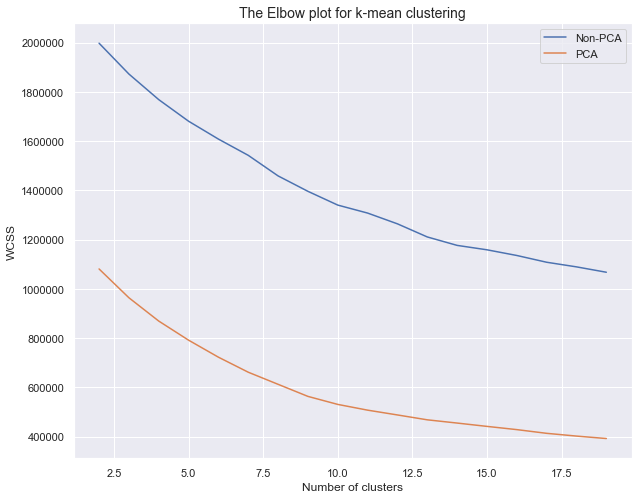

In [9]:
#summarize the cluster performance in python list format for ploting
kmean_clusters_no = list(kmean_withoutPCA_summary_dict.keys())
kmean_withoutPCA_WCSS = []
kmean_PCA_WCSS = []
kmean_withoutPCA_silhouette_score = []
kmean_PCA_silhouette_score = []
for i in kmean_withoutPCA_summary_dict.keys():
    kmean_withoutPCA_silhouette_score.append(kmean_withoutPCA_summary_dict[i]['silhouette_score'])
    kmean_PCA_silhouette_score.append(kmean_PCA_summary_dict[i]['silhouette_score'])
    kmean_withoutPCA_WCSS.append(kmean_withoutPCA_summary_dict[i]['inertia'])
    kmean_PCA_WCSS.append(kmean_PCA_summary_dict[i]['inertia'])

    
#Elbow plot
plt.figure(figsize=(10, 8))
plt.plot(kmean_clusters_no, kmean_withoutPCA_WCSS, label='Non-PCA')
plt.plot(kmean_clusters_no, kmean_PCA_WCSS, label='PCA')
plt.title('The Elbow plot for k-mean clustering', fontdict = {'fontsize':14})
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend(loc='upper right')
#plt.savefig('Results for report/kmean_elbow.png')
plt.show()



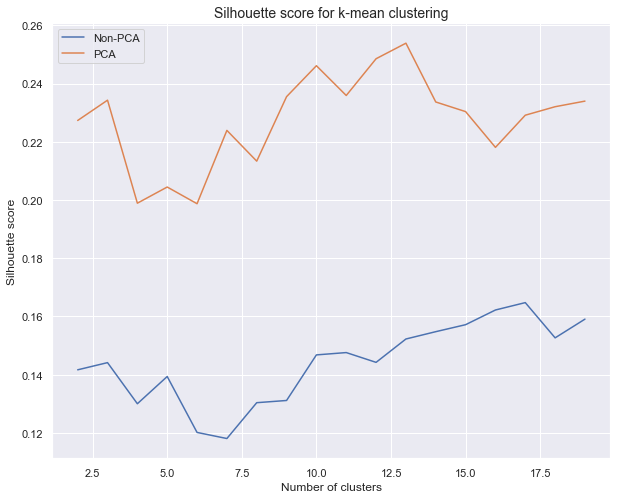

In [10]:
#summary plot
plt.figure(figsize=(10, 8))
plt.plot(kmean_clusters_no, kmean_withoutPCA_silhouette_score, label='Non-PCA')
plt.plot(kmean_clusters_no, kmean_PCA_silhouette_score, label='PCA')
plt.title('Silhouette score for k-mean clustering', fontdict = {'fontsize':14})
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.legend(loc='upper left')
#plt.savefig('Results for report/kmean_silhouette_score.png', dpi=900)
plt.show()

#optimum number of clusters with selected variables in PCA = 7

## 2.2 Cluster all data by kmean algorithm

In [11]:
# for i in range(2, 13):
#     kmeans_pca= KMeans(n_clusters= i, random_state=0).fit(pca_dataset)
#     PCA_data_clusters[str('kmean_cluster_'+str(i))] = kmeans_pca.labels_

PCA_data_clusters.to_csv('data/kmean_clusters_withFlags_8PCA_upto3miles_selectedVariable.csv') 
PCA_data_clusters.head()

,tripDuration,tripDistance_miles,StartTime_AMPeak,StartTime_Day,StartTime_PMPeak,StartTime_Night,origin_emp_density_perMile,destination_emp_density_perMile,destination_pop_density_perMile,origin_pop_density_perMile,...,kmean_cluster_10,kmean_cluster_11,kmean_cluster_12,kmean_cluster_13,kmean_cluster_14,kmean_cluster_15,kmean_cluster_16,kmean_cluster_17,kmean_cluster_18,kmean_cluster_19
0,4.863267,0.659896,0,0,0,1,66028.995549,4651.938119,345.957386,7681.096624,...,8,8,0,12,11,12,2,4,4,18
1,2.301083,0.239849,0,0,0,1,171759.500659,17769.861925,9298.818799,0.000000,...,4,4,2,2,6,2,7,16,16,16
2,1.526600,0.079536,0,0,0,1,76697.996907,317589.557663,4883.546206,7823.160193,...,9,9,6,6,12,6,3,8,8,8
3,5.664400,0.259733,0,0,0,1,93878.933828,93878.933828,5061.155631,5061.155631,...,8,8,0,0,13,13,11,7,7,7
4,6.711383,0.449873,0,0,0,1,130038.135042,47729.808467,0.000000,9960.458481,...,8,8,0,0,13,13,11,7,7,7


# 3 Hierarchical clustering

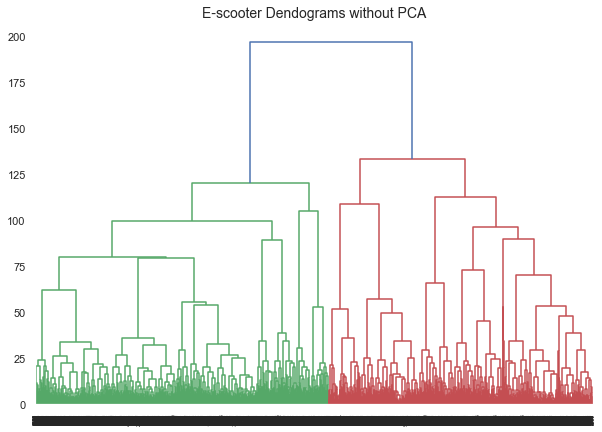

In [12]:
X_scaled_hc_sample = pd.DataFrame(nonPCA_data_scaled).sample(6000)

plt.figure(figsize=(10, 7))
plt.title("E-scooter Dendograms without PCA", fontdict = {'fontsize':14})
dend = shc.dendrogram(shc.linkage(X_scaled_hc_sample, method='ward'))
plt.show()
#plt.savefig('Results for report/HC dendrogram without PCA.png', dpi=900)

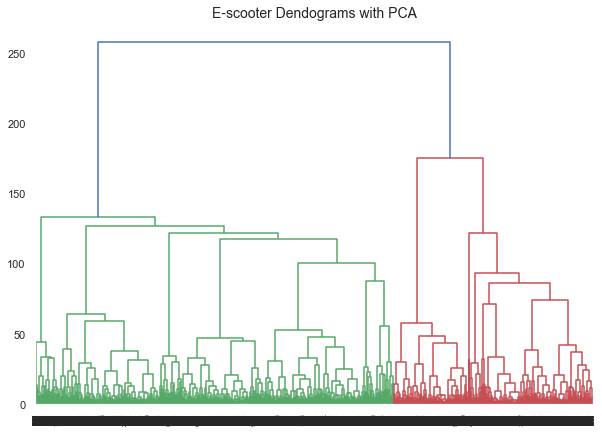

In [13]:
pca_dataset_sample = pca_dataset.sample(10000)

plt.figure(figsize=(10, 7))
plt.title("E-scooter Dendograms with PCA", fontdict = {'fontsize':14})
dend = shc.dendrogram(shc.linkage(pca_dataset_sample, method='ward'))
plt.show()
#plt.savefig('Results for report/HC dendrogram with PCA.png', dpi=900)

## 3.2 Hierarchical cluster performance

In [14]:
(nonPCA_data_scaled_sample, 
 pca_dataset_sample, 
 PCA_data_clusters_sample) = read_prepare_data(pd.read_csv(
    'data/MarchMonth_landuse_percentageVar_RouteDirectness__WithFlags_withoutRouteData.csv')
                                               .sample(50000, random_state=0))


In [15]:


# nonPCA_data_scaled_sample = pd.DataFrame(nonPCA_data_scaled).sample(30000)
# pca_dataset_sample = pca_dataset.sample(30000)

# define a dictionary that contains all of our relevant info.
hc_withoutPCA_summary_dict = {}
hc_PCA_summary_dict = {}

for i in range(2, 20):
    ####non-PCA dataset
    # define the next dictionary to hold all the results of this run.
    hc_withoutPCA_summary_dict[i] = {}
    
    # create an instance of the model, and fit the training data to it.
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
 
    # define the silhouette score
    sil_score = metrics.silhouette_score(nonPCA_data_scaled_sample, 
                                         hc.fit_predict(nonPCA_data_scaled_sample),
                                         metric='euclidean')
    
    # store the different metrics
    hc_withoutPCA_summary_dict[i]['silhouette_score'] = sil_score
    
    
    #---------------------------------------------------
    ####PCA dataset
    # define the next dictionary to hold all the results of this run.
    hc_PCA_summary_dict[i] = {}
    
    # create an instance of the model, and fit the training data to it.
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward' )
 
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset_sample, 
                                         hc.fit_predict(pca_dataset_sample),
                                         metric='euclidean')
    
    # store the different metrics
    hc_PCA_summary_dict[i]['silhouette_score'] = sil_score

In [16]:
# print(hc_withoutPCA_summary_dict)
# print(hc_PCA_summary_dict)

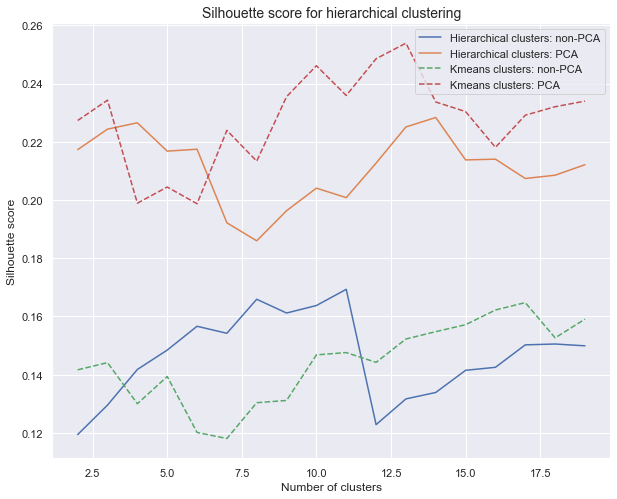

In [17]:
#summarize the cluster performance in python list format for ploting
hc_clusters_no = list(hc_withoutPCA_summary_dict.keys())
hc_withoutPCA_silhouette_score = []
hc_PCA_silhouette_score = []
for i in hc_withoutPCA_summary_dict.keys():
    hc_withoutPCA_silhouette_score.append(hc_withoutPCA_summary_dict[i]['silhouette_score'])
    hc_PCA_silhouette_score.append(hc_PCA_summary_dict[i]['silhouette_score'])

#summary plot
plt.figure(figsize=(10, 8))
plt.plot(hc_clusters_no, hc_withoutPCA_silhouette_score, label='Hierarchical clusters: non-PCA')
plt.plot(hc_clusters_no, hc_PCA_silhouette_score, label='Hierarchical clusters: PCA')
plt.plot(kmean_clusters_no, kmean_withoutPCA_silhouette_score, label='Kmeans clusters: non-PCA', linestyle='--')
plt.plot(kmean_clusters_no, kmean_PCA_silhouette_score, label='Kmeans clusters: PCA', linestyle='--')
plt.title('Silhouette score for hierarchical clustering', fontdict = {'fontsize':14})
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.legend(loc='upper right')
#plt.savefig('Results for report/hc_silhouette_score.png', dpi=900)
plt.show()

In [18]:
# clusters_summary = pd.DataFrame(list(zip(kmean_clusters_no, kmean_withoutPCA_WCSS,kmean_PCA_WCSS,
#                       kmean_withoutPCA_silhouette_score,kmean_PCA_silhouette_score,
#                                         hc_withoutPCA_silhouette_score,hc_PCA_silhouette_score)),
#             columns=['number_of_clusters','WCSS_Kmeans_without_PCA','WCSS_Kmeans_with_PCA',
#                     'silhouette_score_Kmeans_without_PCA','silhouette_score_Kmeans_with_PCA',
#                     'silhouette_score_hc_without_PCA','silhouette_score_hc_with_PCA'])
# #kmean_summary.to_csv('Kmean_score_summary.csv')
# clusters_summary

## 3.3 Cluster data

In [19]:
# for i in range(3, 13):
#     hc_pca = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
#     PCA_data_clusters_sample[str('hc_cluster_'+str(i))] = hc_pca.fit_predict(pca_dataset_sample)

# PCA_data_clusters_sample.head()

# 4 Gaussian Mixture Model

## 5.1 Selected variables

In [20]:
# scaler = StandardScaler()

# X =selected_data
# # selected_X = scaler.fit_transform(X)


# # Make an instance of the Model
# pca = PCA()

# # create a PCA modified dataset
# pca_selected_data_df = PCA(n_components=2).fit(X).transform(X)

# # store it in a new data frame
# pca_selected_data= pd.DataFrame(data = pca_selected_data_df, columns = ['principal component 1', 'principal component 2'])

# nonPCA_data_scaled = nonPCA_data_scaled[:100]
# pca_dataset = pca_dataset.sample(1000)

# define a dictionary that contains all of our relevant info.
gmm_withoutPCA_summary_dict = {}
gmm_PCA_summary_dict = {}

for i in range(2, 20):
    ####non-PCA dataset
    # define the next dictionary to hold all the results of this run.
    gmm_withoutPCA_summary_dict[i] = {}
    
    # create an instance of the model, and fit the training data to it.
    gmm=GaussianMixture(n_components=i,  covariance_type='full',reg_covar= 1e-6, random_state=0).fit(nonPCA_data_scaled)
    non_pca_labels = gmm.predict(nonPCA_data_scaled)
    
 
    # define the silhouette score
    sil_score = metrics.silhouette_score(nonPCA_data_scaled, non_pca_labels, metric='euclidean')
    
    # store the different metrics
    gmm_withoutPCA_summary_dict[i]['silhouette_score'] = sil_score
    
    #---------------------------------------------------
    ####PCA dataset
    # define the next dictionary to hold all the results of this run.
    gmm_PCA_summary_dict[i] = {}
    
    # create an instance of the model, and fit the training data to it.
    gmm=GaussianMixture(n_components=i,  covariance_type='full',reg_covar= 1e-6, random_state=0).fit(pca_dataset)
    pca_labels = gmm.predict(pca_dataset)
    
 
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, pca_labels, metric='euclidean')
    
    # store the different metrics
    gmm_PCA_summary_dict[i]['silhouette_score'] = sil_score


# n_components = np.arange(1,10,1)
# models= [GaussianMixture(n_components=n,  covariance_type='full', random_state=0).fit(pca_dataset)
#           for n in n_components]



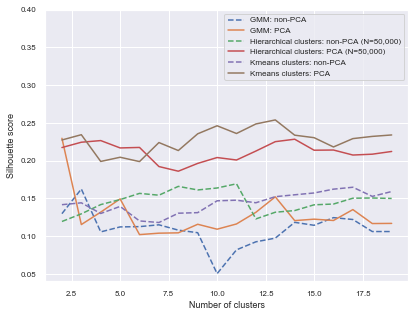

In [21]:
#summarize the cluster performance in python list format for ploting
gmm_clusters_no = list(gmm_withoutPCA_summary_dict.keys())
gmm_withoutPCA_silhouette_score = []
gmm_PCA_silhouette_score = []
for i in gmm_withoutPCA_summary_dict.keys():
    gmm_withoutPCA_silhouette_score.append(gmm_withoutPCA_summary_dict[i]['silhouette_score'])
    gmm_PCA_silhouette_score.append(gmm_PCA_summary_dict[i]['silhouette_score'])

    
    #'medium green', 'denim blue'
#summary plot
plt.figure(figsize=(6.5, 5))
plt.plot(gmm_clusters_no, gmm_withoutPCA_silhouette_score, label='GMM: non-PCA',linestyle='--')
plt.plot(gmm_clusters_no, gmm_PCA_silhouette_score, label='GMM: PCA')

plt.plot(hc_clusters_no, hc_withoutPCA_silhouette_score, label='Hierarchical clusters: non-PCA (N=50,000)', linestyle='--')
plt.plot(hc_clusters_no, hc_PCA_silhouette_score, label='Hierarchical clusters: PCA (N=50,000)')
plt.plot(kmean_clusters_no, kmean_withoutPCA_silhouette_score, label='Kmeans clusters: non-PCA', linestyle='--')
plt.plot(kmean_clusters_no, kmean_PCA_silhouette_score, label='Kmeans clusters: PCA')


#plt.title('Silhouette score for GMM clustering', fontdict = {'fontsize':14})
plt.axis([None, None, None, 0.4])
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Number of clusters', fontsize=9)
plt.ylabel('Silhouette score', fontsize=9)

plt.legend(loc='upper right', fontsize=8)
plt.savefig(str(folder_name+'/ModelComparision_8pca_upto3miles.png'), dpi=900)


In [22]:
clustering_summary = pd.DataFrame(list(zip(kmean_clusters_no, 
                                           kmean_withoutPCA_silhouette_score,kmean_PCA_silhouette_score,
                                           hc_withoutPCA_silhouette_score,hc_PCA_silhouette_score,
                                          gmm_withoutPCA_silhouette_score,gmm_PCA_silhouette_score)),
            columns=['number_of_clusters',
                     'silhouette_score_Kmeans_without_PCA','silhouette_score_Kmeans_with_PCA',
                     'silhouette_score_HC_without_PCA','silhouette_score_HC_with_PCA',
                     'silhouette_score_GMM_without_PCA','silhouette_score_GMM_with_PCA'])
clustering_summary.to_csv('results/cluster_score_summary_8pca_N=upto20.csv')
clustering_summary

,number_of_clusters,silhouette_score_Kmeans_without_PCA,silhouette_score_Kmeans_with_PCA,silhouette_score_HC_without_PCA,silhouette_score_HC_with_PCA,silhouette_score_GMM_without_PCA,silhouette_score_GMM_with_PCA
0,2,0.141688,0.227319,0.119449,0.217305,0.129789,0.229565
1,3,0.144156,0.234294,0.129582,0.224348,0.162451,0.115392
2,4,0.130037,0.198914,0.141813,0.226524,0.105683,0.131835
3,5,0.139390,0.204466,0.148459,0.216792,0.112269,0.149309
4,6,0.120183,0.198730,0.156644,0.217448,0.112648,0.102091
5,7,0.118087,0.223918,0.154233,0.192169,0.115057,0.103985
6,8,0.130397,0.213354,0.165917,0.186002,0.108004,0.104429
7,9,0.131156,0.235498,0.161192,0.196332,0.104598,0.115771
8,10,0.146811,0.246128,0.163768,0.204081,0.050461,0.109241
9,11,0.147609,0.235901,0.169333,0.200822,0.081938,0.116181


# save cluster database

In [23]:
#PCA_data_clusters.to_csv("k_mean_final_clusters.csv")

In [24]:
elapsed_time = time.time() - start_time
print("execution time: ",elapsed_time)


execution time:  11707.034814834595
